In [2]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
hotel_df=pd.read_csv("hotel_bookings.csv")
hotel_df.head() # xem thử data có gì 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_df.info() #xem có bao nhiêu cột ở dataset và có loại của nó

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_df.isnull().sum()
#kiem tra xem có nhiều giá trị null không

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


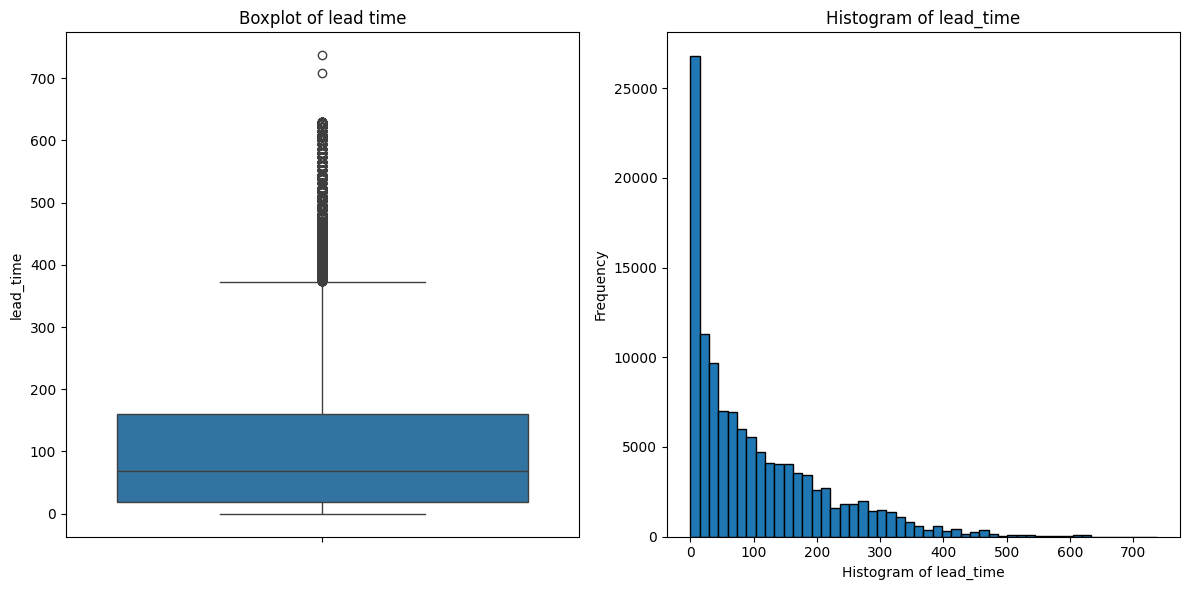

In [27]:
import seaborn as sns
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=hotel_df["lead_time"])
plt.title("Boxplot of lead time");

plt.subplot(1,2,2)
plt.hist(hotel_df["lead_time"],bins=50,edgecolor='black')
plt.title("Histogram of lead_time")

plt.xlabel("Histogram of lead_time")
plt.ylabel("Frequency")
plt.tight_layout();

In [30]:
df1=hotel_df.copy()

In [31]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
df1['is_canceled'].unique()

array([0, 1])

In [33]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [34]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [35]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [36]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [37]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

## Cleaning data
- Remove duplicate rows
- Handling missing values
- Convert columns to approriate datatypes
- adding important columns

### Step 1 : Removing duplicate rows if any

In [40]:
df1[df1.duplicated()].shape

(31994, 32)

In [41]:
df1.shape

(119390, 32)

In [44]:
df1.drop_duplicates(inplace=True)
df1.shape

(87396, 32)

### Step 2 : Handling missing values

In [47]:
df1.isnull().sum().sort_values(ascending=False)[:6]
# Sap xep giam dan 6 gia tri cot ma bi thieu du lieu nhieu nhat


company                     82137
agent                       12193
country                       452
children                        4
arrival_date_month              0
arrival_date_week_number        0
dtype: int64

In [51]:
df1[['company','agent']]=df1[['company','agent']].fillna(0)

df1["children"].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [55]:
df1['children'] = df1['children'].fillna(df1['children'].mean())


In [56]:
df1["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [65]:
df1['country'] = df1['country'].fillna('others')
df1.isnull().sum().sort_values(ascending=False)[:6]

hotel                       0
is_canceled                 0
lead_time                   0
arrival_date_year           0
arrival_date_month          0
arrival_date_week_number    0
dtype: int64

In [72]:
df1["total_guests"] = df1["adults"] + df1["children"] + df1["babies"]

invalid_rows=df1[df1["total_guests"]==0]

print(invalid_rows.shape)

(0, 33)


In [74]:
df1.drop(invalid_rows.index, inplace=True)


In [76]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

## EDA

In [78]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


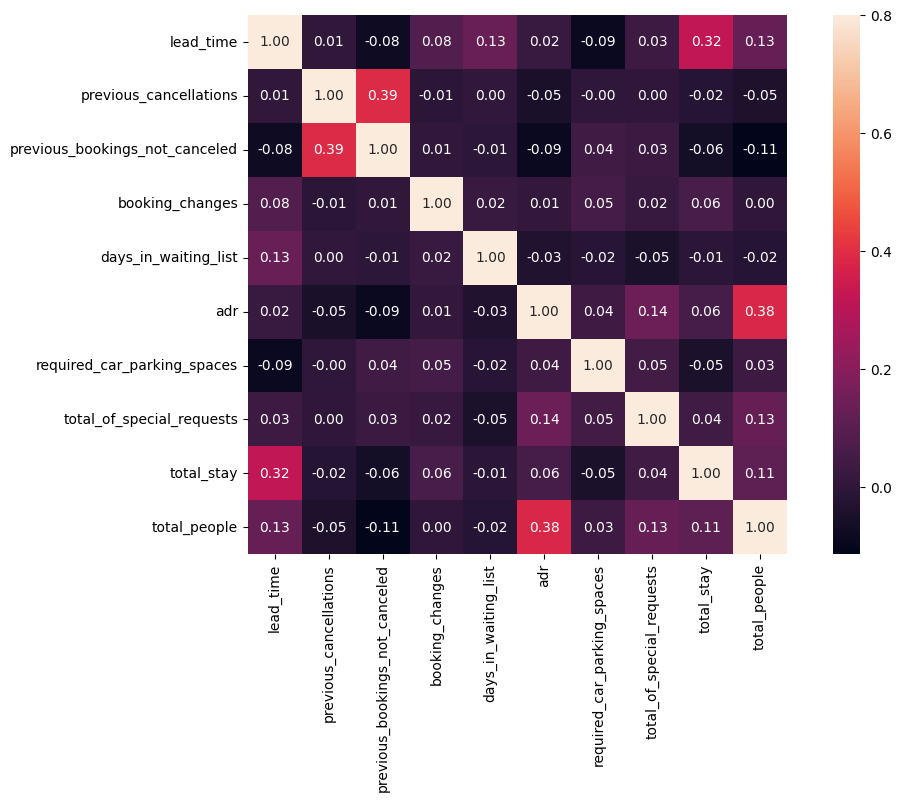

In [81]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

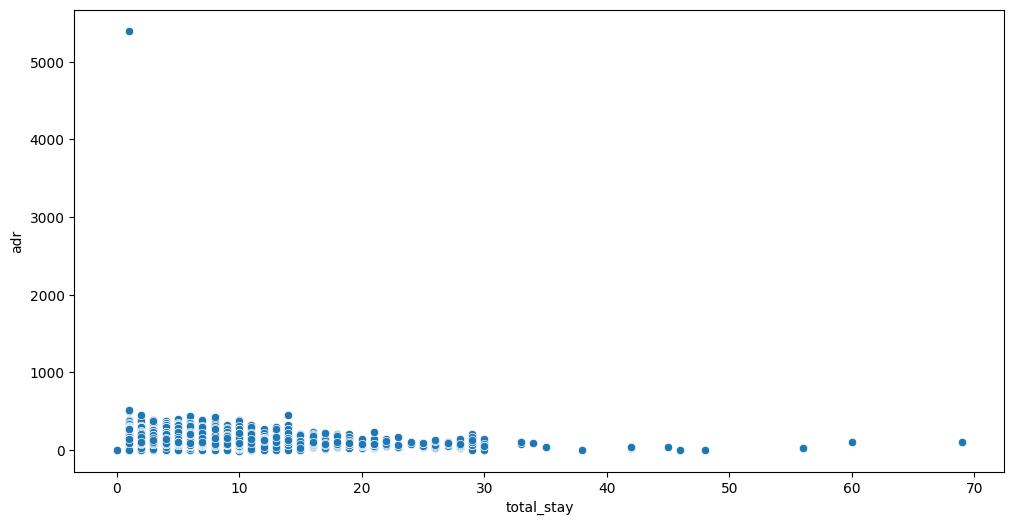

In [83]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

In [86]:
df1.drop(df1[df1['adr']>5000].index,inplace=True)

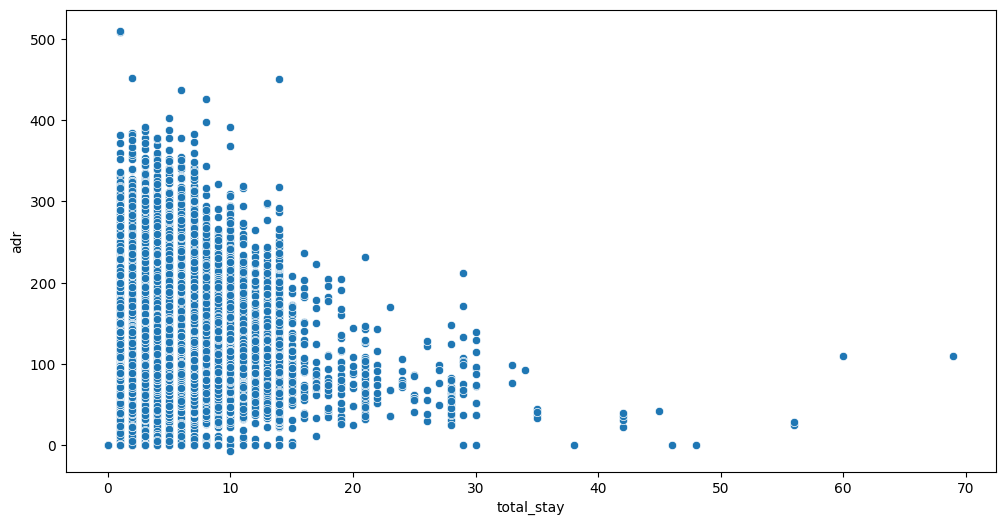

In [88]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

In [89]:
# Q1) Which agent makes most no. of bookings?

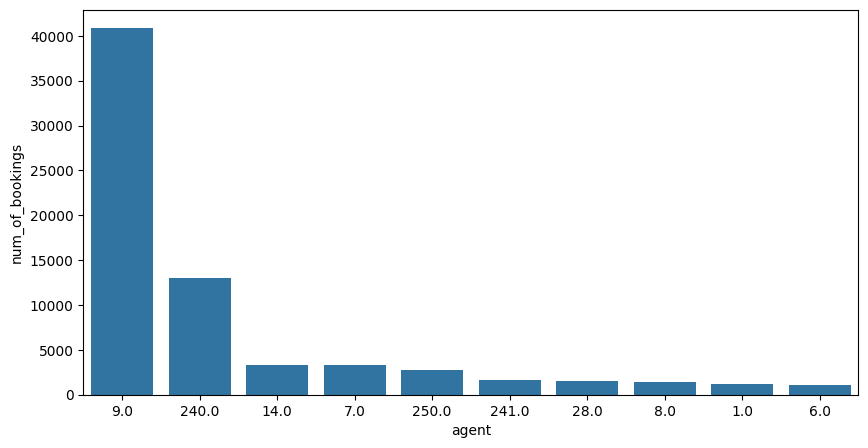

In [94]:
# Đếm số lượng booking theo agent
d1 = df1['agent'].value_counts().reset_index(name='num_of_bookings')

# Đổi tên cột cho rõ nghĩa
d1.rename(columns={'index': 'agent'}, inplace=True)

# Bỏ agent = 0
d1 = d1[d1['agent'] != 0]

# Chọn top 10
d1 = d1.head(10)

# Vẽ barplot
plt.figure(figsize=(10,5))
sns.barplot(
    x='agent',
    y='num_of_bookings',
    data=d1,
    order=d1.sort_values('num_of_bookings', ascending=False)['agent']
)
plt.show()


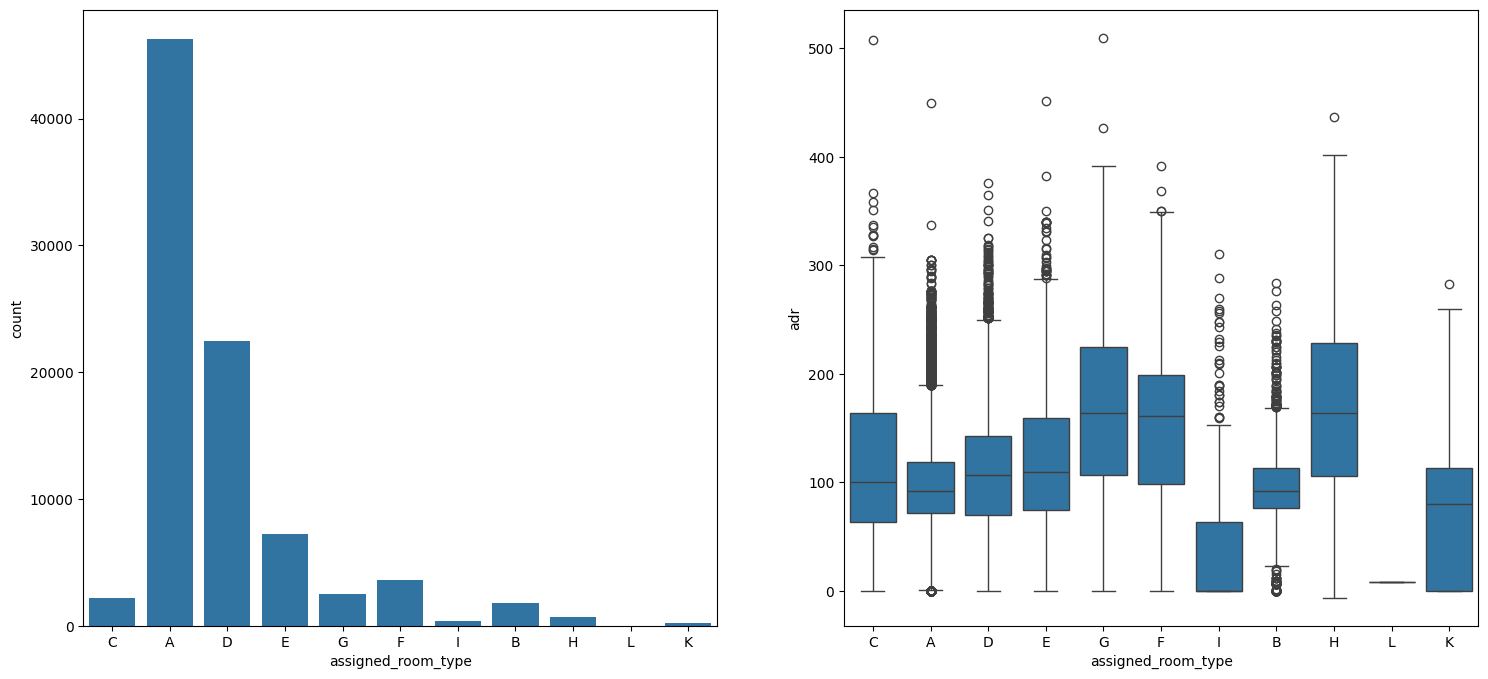

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
plt.show()

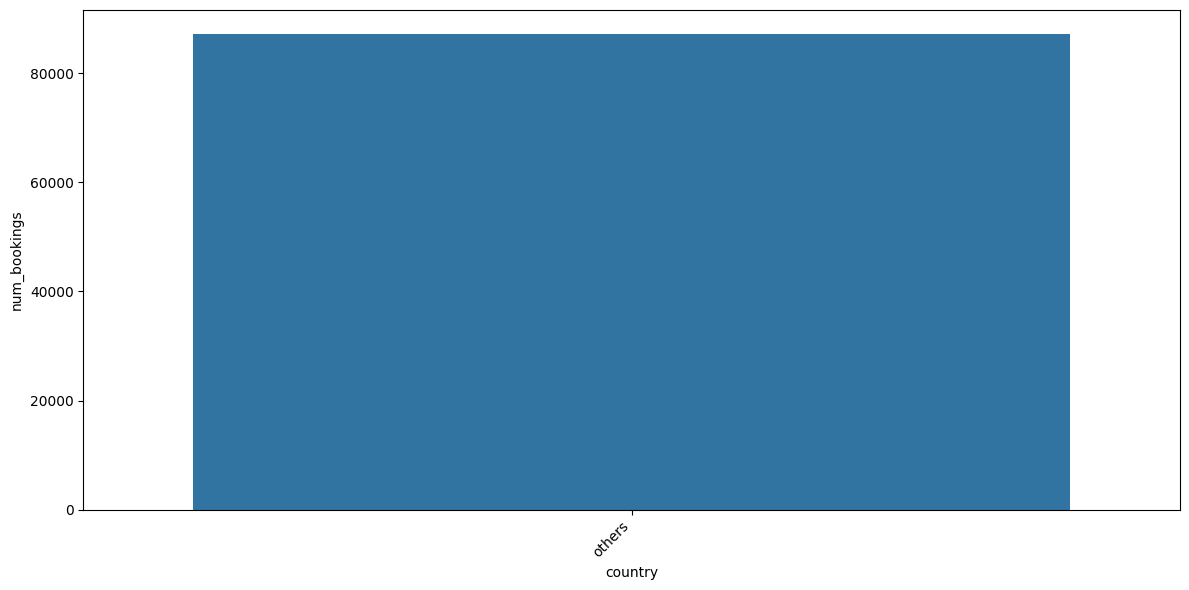

In [104]:
d2 = (
    df1.groupby('country')
       .size()
       .reset_index(name='num_bookings')
       .sort_values('num_bookings', ascending=False)
       .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=d2,
    x='country', y='num_bookings',
    order=d2['country']
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


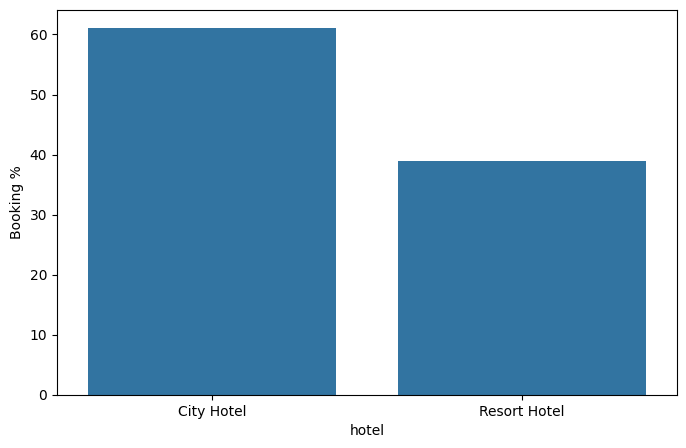

In [106]:
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

/tmp/ipykernel_7532/773686721.py:1: FutureWarning: The provided callable <function mean at 0x7f81b07e9940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr


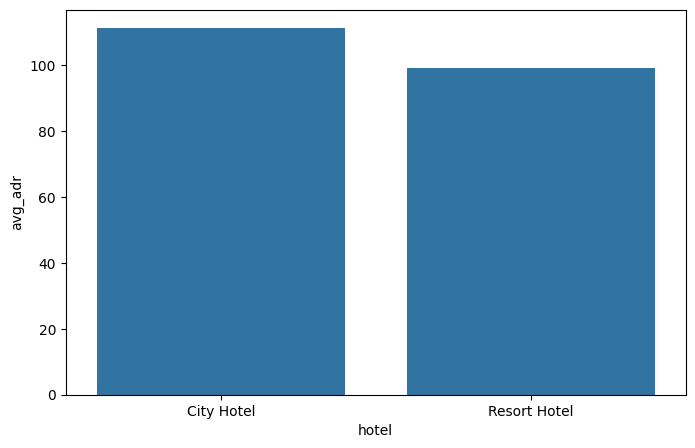

In [108]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

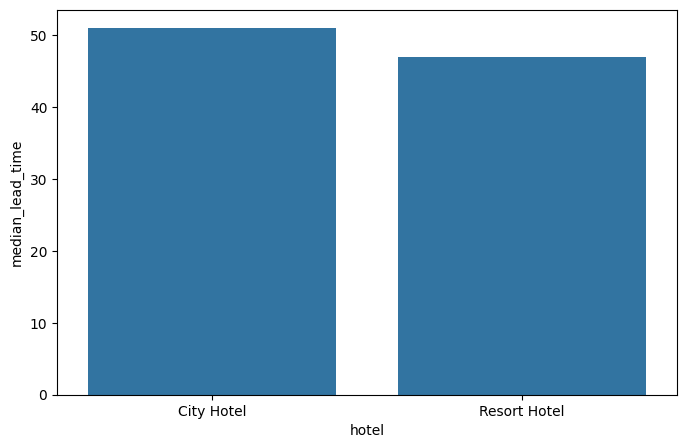

In [110]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

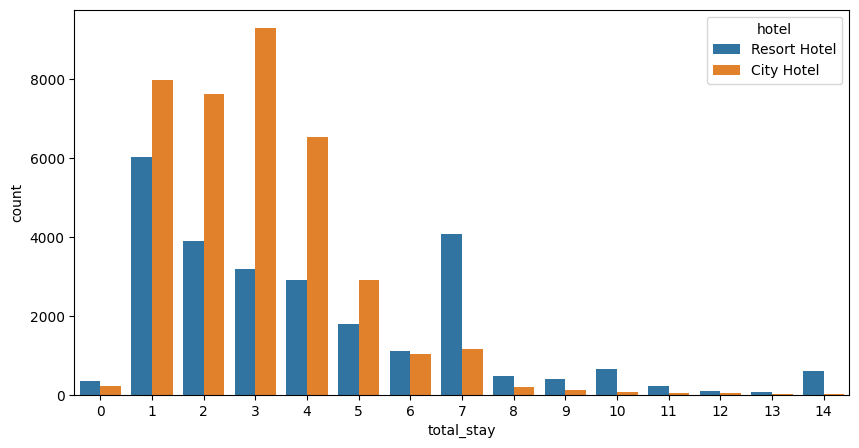

In [112]:
not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

/tmp/ipykernel_7532/3779185583.py:1: FutureWarning: The provided callable <function mean at 0x7f81b07e9940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))


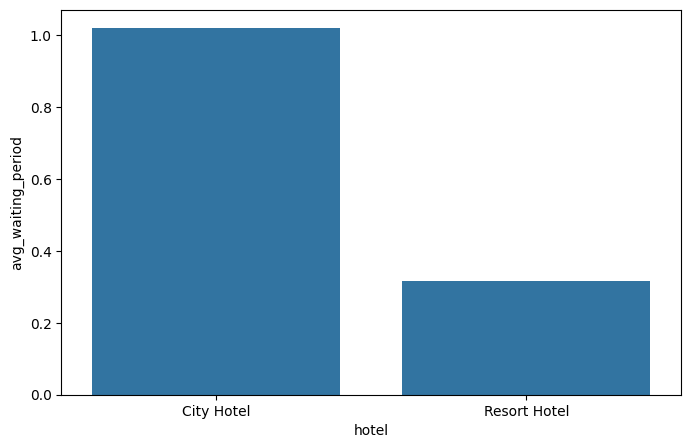

In [114]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

In [115]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


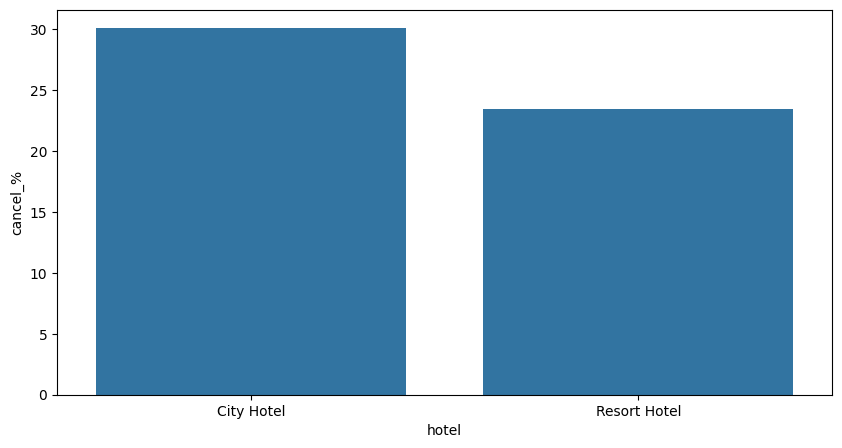

In [117]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

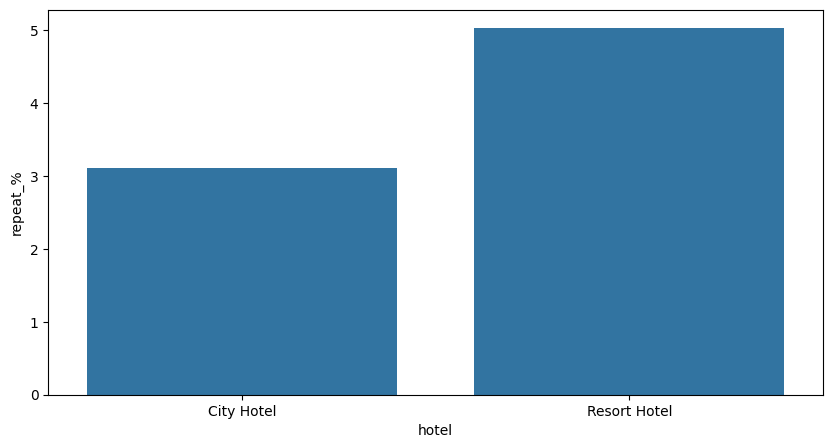

In [119]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

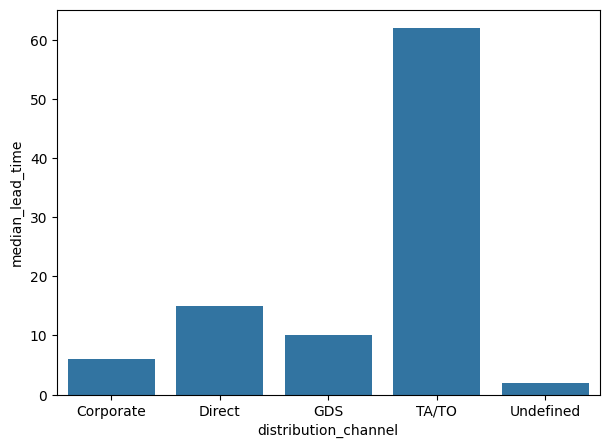

In [121]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

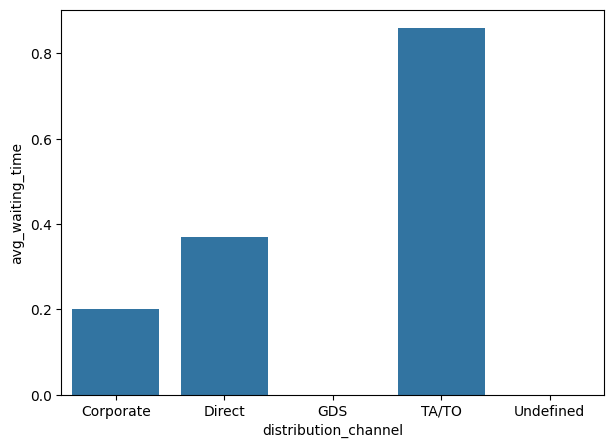

In [123]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

/tmp/ipykernel_7532/527623541.py:2: FutureWarning: The provided callable <function mean at 0x7f81b07e9940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})


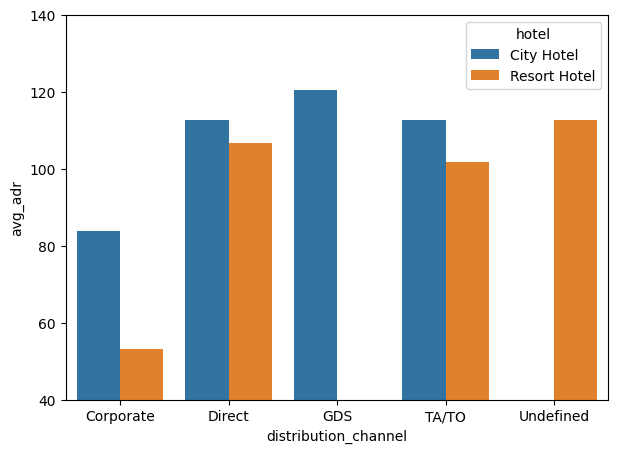

In [125]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

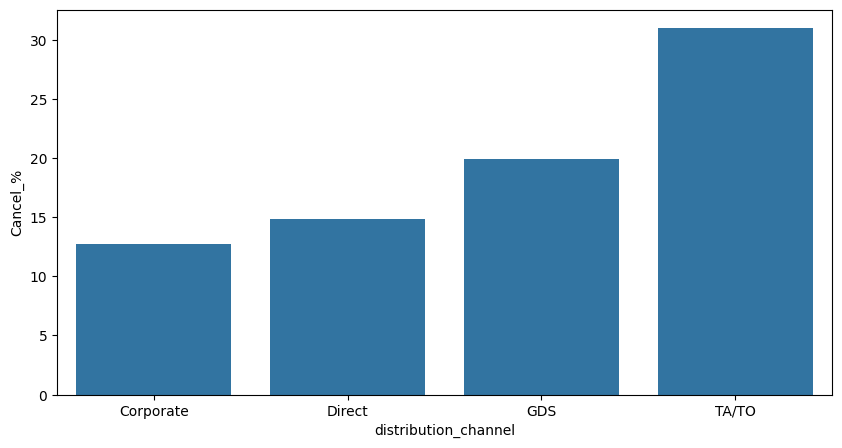

In [126]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

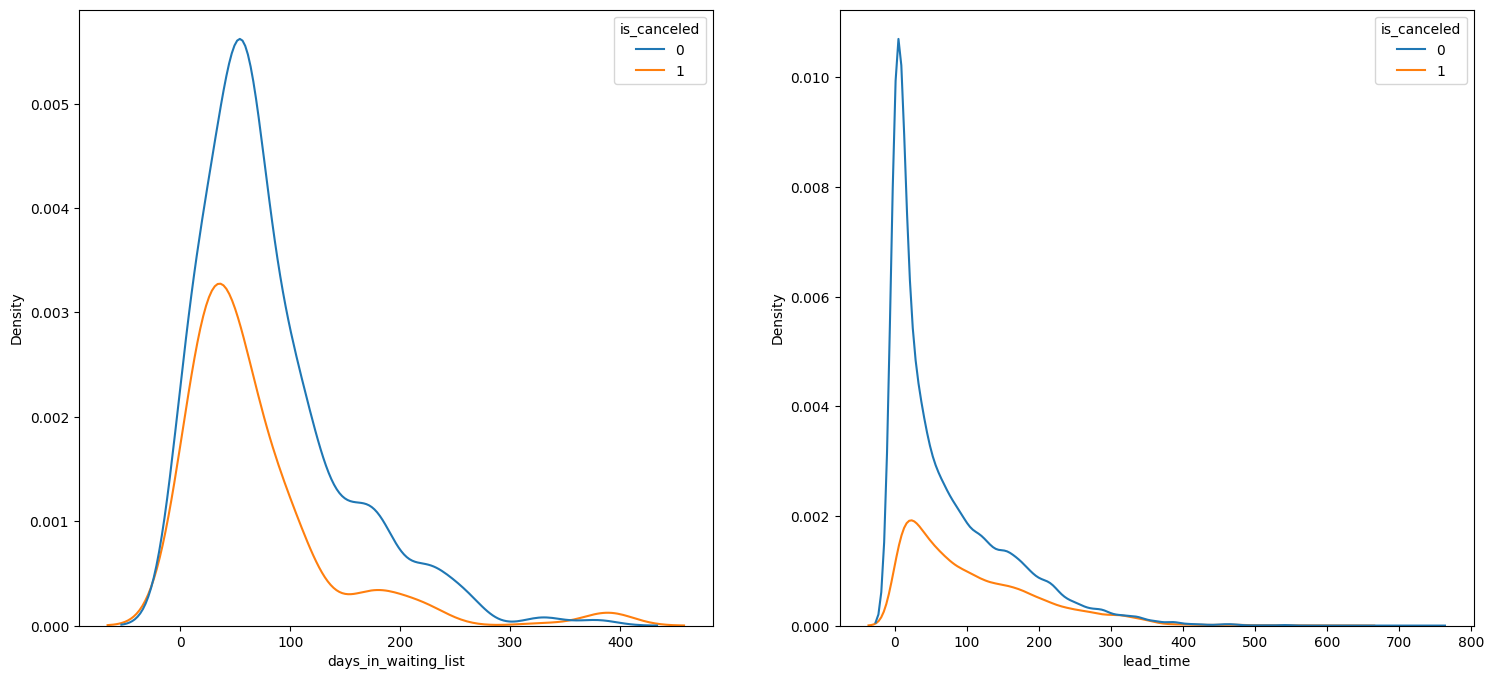

In [128]:

waiting_bookings = df1[df1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df1['lead_time'], hue = df1['is_canceled'])
plt.show()

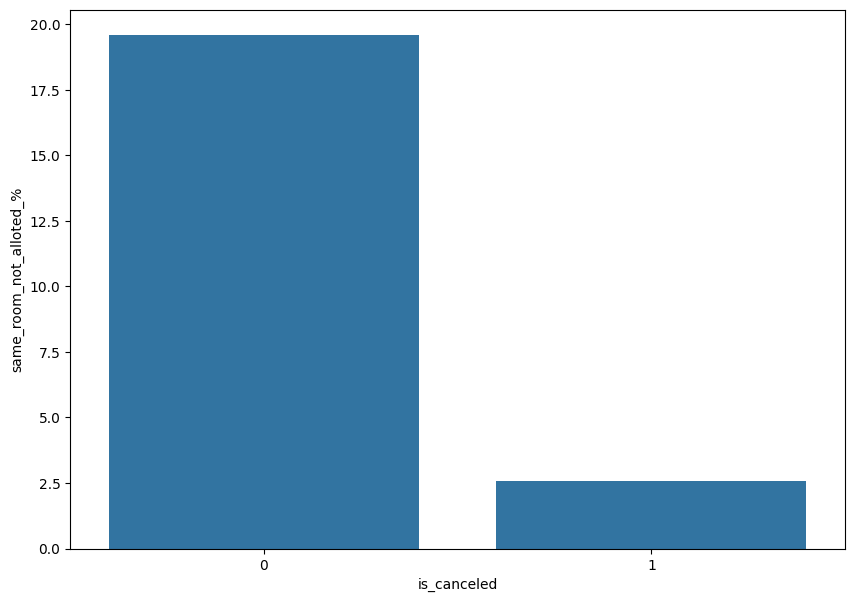

In [130]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

df1['same_room_not_alloted'] = df1.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = df1.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

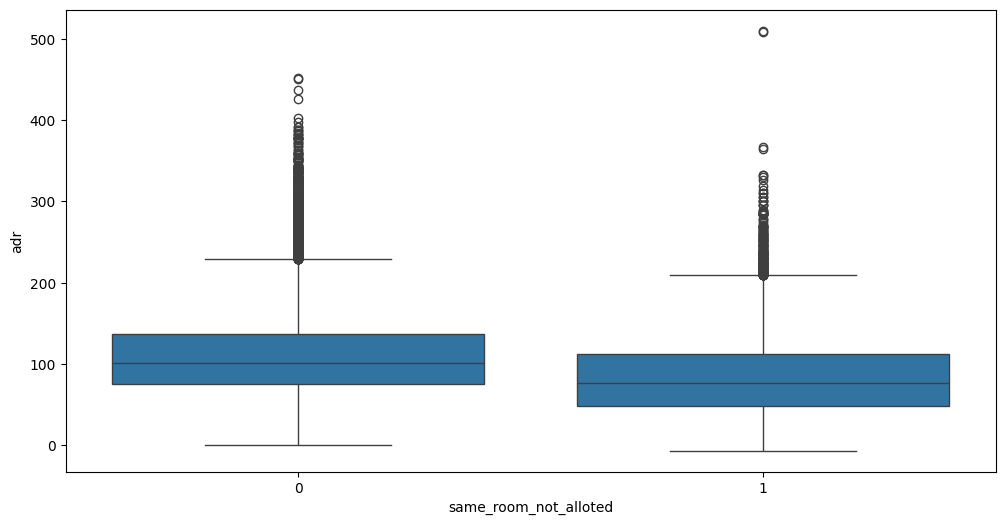

In [132]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = df1)
plt.show()

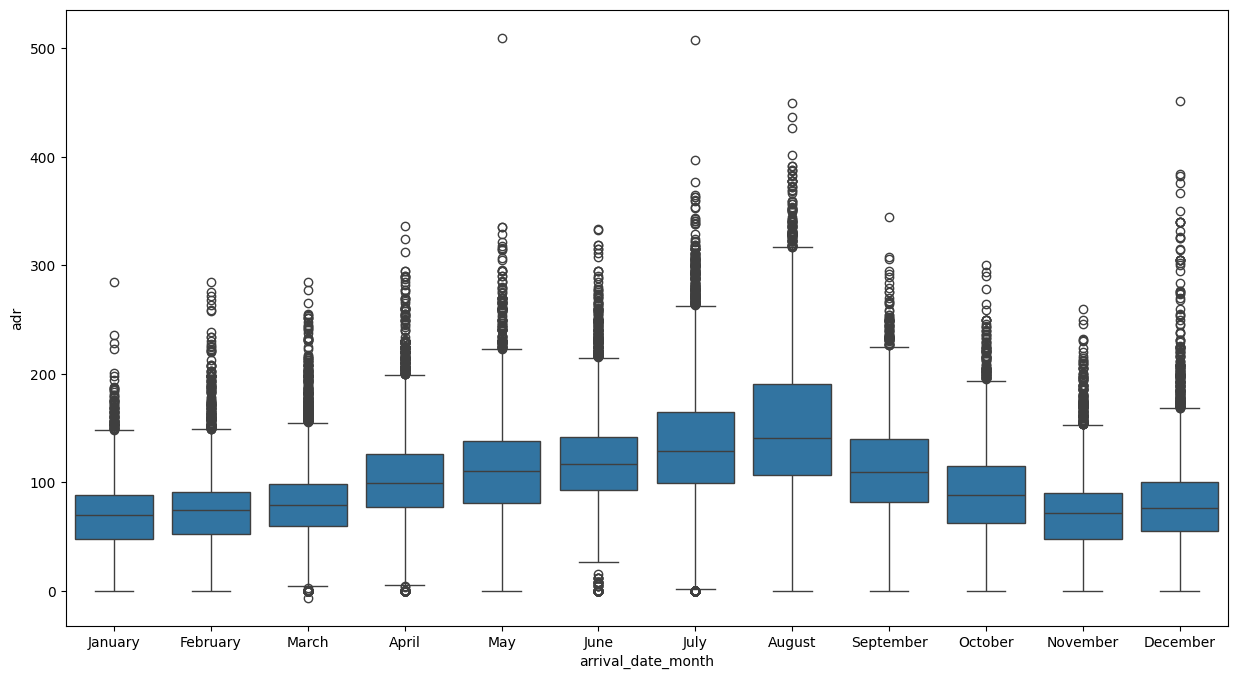

In [134]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

/tmp/ipykernel_7532/2568571059.py:2: FutureWarning: The provided callable <function mean at 0x7f81b07e9940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)


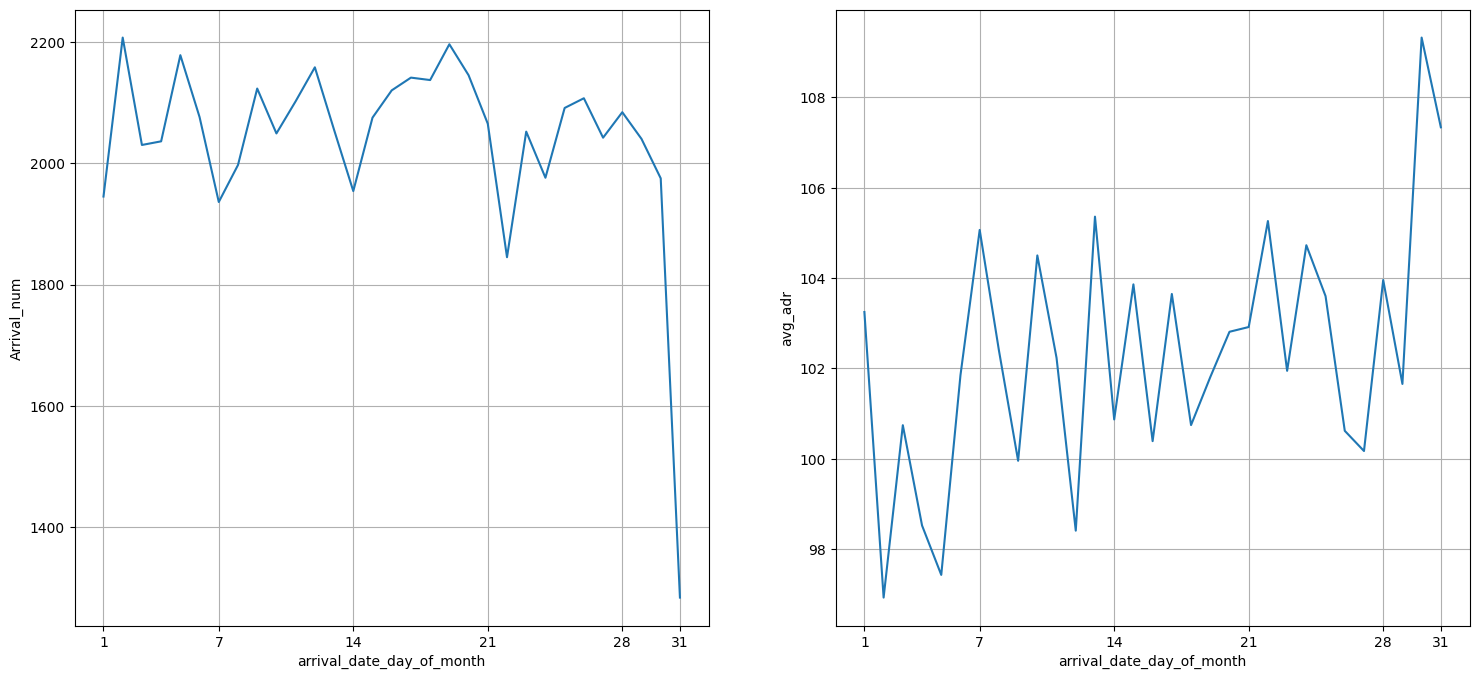

In [137]:

d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g = sns.lineplot(ax = axes[0],x = d6.index, y = d6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h = sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()

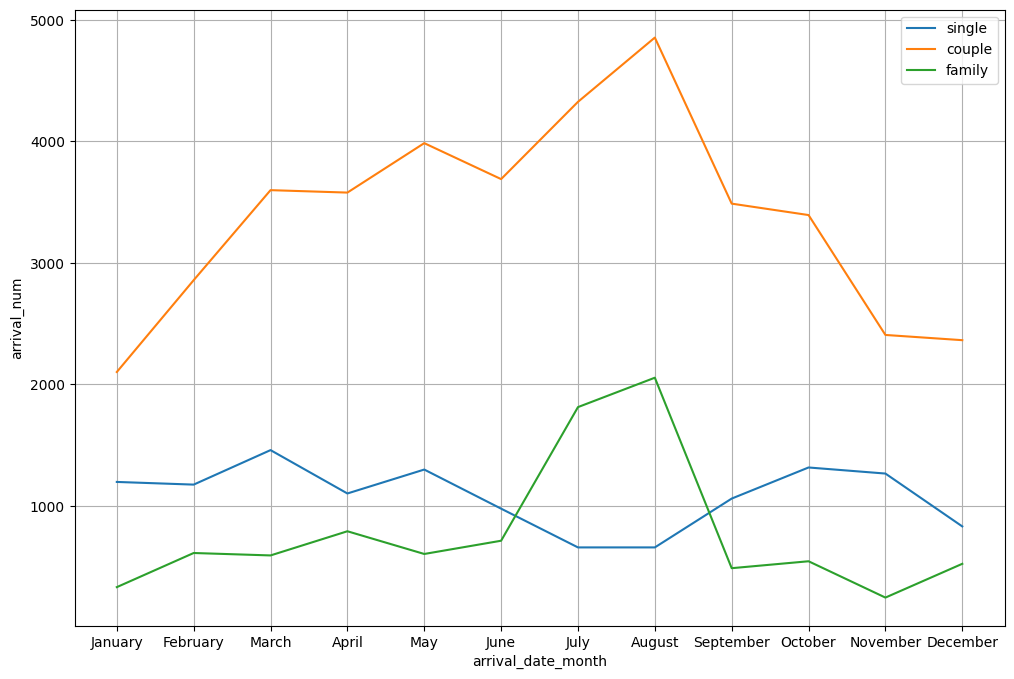

In [138]:
## Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()